# BÀI THỰC HÀNH 1: XÂY DỰNG MẠNG NEURON ĐƠN GIẢN

<b>Hướng dẫn nộp bài:</b>
- Folder chứa toàn bộ source code, đặt tên là <b>\<MSSV\>.zip</b> với \<MSSV\> là MSSV của các bạn.
- Nộp qua course, giảng viên sẽ tạo submission sau mỗi buổi học.

Bộ dữ liệu sử dụng: MNIST dataset.

Link download: http://yann.lecun.com/exdb/mnist/.

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers

from keras.datasets import mnist
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

## Tải dữ liệu

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Chuẩn bị dữ liệu

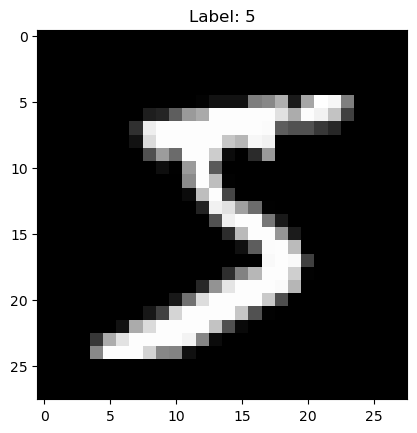

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

### Xem kích thước hai tập train, test

In [4]:
print(f"Kích thước tập train {X_train.shape}, kích thước tập test {X_test.shape}")

Kích thước tập train (60000, 28, 28), kích thước tập test (10000, 28, 28)


### Đếm số lượng ảnh mỗi lớp trong tập train/test để kiểm tra phân bố dữ liệu

Số lượng ảnh trong tập train: 60000
Số lượng ảnh trong tập test: 10000


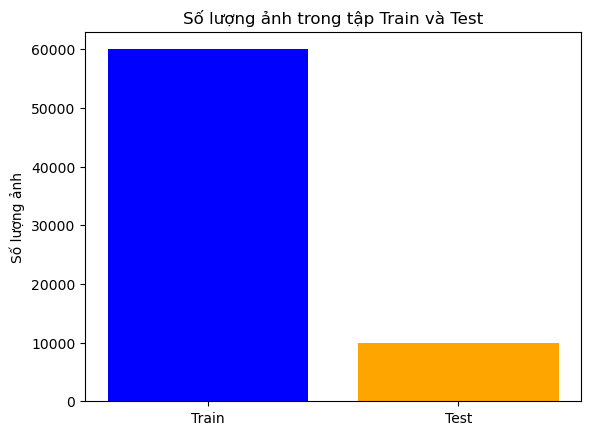

In [5]:
n_samples_train, weight_train, height_train = X_train.shape
n_samples_test, weight_test, height_test = X_test.shape

print(f"Số lượng ảnh trong tập train: {n_samples_train}")
print(f"Số lượng ảnh trong tập test: {n_samples_test}")

plt.bar(['Train', 'Test'], [n_samples_train, n_samples_test], color=['blue', 'orange'])
plt.ylabel('Số lượng ảnh')
plt.title('Số lượng ảnh trong tập Train và Test')
plt.show()

### Biểu đồ cột thể hiện sự phân bố các nhãn có trong tập train

Text(0.5, 1.0, 'Phân bố nhãn trong tập Train')

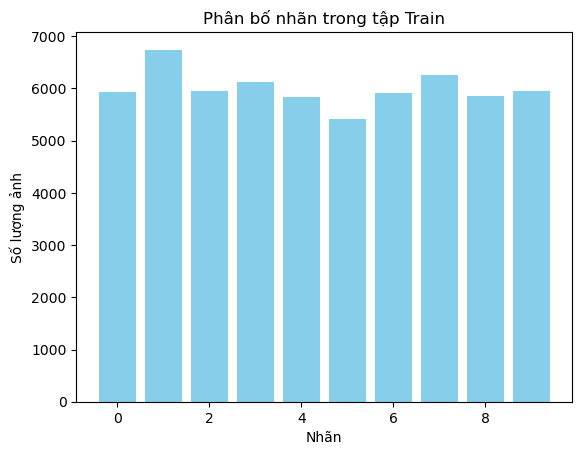

In [6]:
unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts, color='skyblue')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng ảnh')
plt.title('Phân bố nhãn trong tập Train')

>Ta thấy tỉ lệ nhãn khá cân bằng, dữ liệu training không bị mất cân bằng nhãn.

### Biểu đồ tròn thể hiện tỉ lệ các nhãn có trong tập train

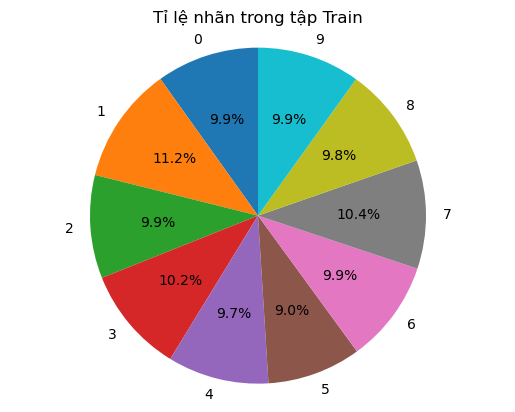

In [7]:
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ nhãn trong tập Train')
plt.axis('equal')
plt.show()

# Bài tập thực hành

### Flatten input ảnh

In [8]:
# Ta cần flatten ảnh về dạng vector 1 chiều vì MLP hay neural network chỉ nhận đầu vào là vector 1 chiều
X_train_flat = X_train.reshape(-1, weight_train * height_train).astype('float32') / 255.0 
# -1 là placeholder để tự động tính toán số lượng hàng - có thể thay thế bằng n_samples_train - X_train.shape[0]
# astype('float32') để khi thực hiện phép chia đúng cho 255, vì nếu kiểu int: 128/255 = 0 sẽ gần như luôn trả về 0, 
# Các phép tính trong Neural Network thường dùng float32 để hoạt động chính xác
# /255.0 để chuẩn hóa dữ liệu về khoảng [0, 1] -> Học nhanh hơn, tránh gradient explosion 

print(f"Kích thước tập train sau khi flatten: {X_train_flat.shape}")
print(f"Giá trị min và max trong tập train sau khi flatten: {X_train_flat.min()}, {X_train_flat.max()}")
print(f"Ví dụ 20 giá trị đầu tiên của vector ảnh sau khi flatten: {X_train_flat[0][300:400]}") 

Kích thước tập train sau khi flatten: (60000, 784)
Giá trị min và max trong tập train sau khi flatten: 0.0, 1.0
Ví dụ 20 giá trị đầu tiên của vector ảnh sau khi flatten: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.54509807 0.99215686 0.74509805 0.00784314 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04313726
 0.74509805 0.99215686 0.27450982 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.13725491 0.94509804
 0.88235295 0.627451   0.42352942 0.00392157 0.

In [9]:
# Tương tự cho X_test
X_test_flat = X_test.reshape(-1, weight_test * height_test).astype('float32') / 255.0

print(f"Kích thước tập test sau khi flatten: {X_test_flat.shape}")
print(f"Giá trị min và max trong tập test sau khi flatten: {X_test_flat.min()}, {X_test_flat.max()}")
print(f"Ví dụ vector ảnh sau khi flatten: {X_test_flat[0][300:400]}")

Kích thước tập test sau khi flatten: (10000, 784)
Giá trị min và max trong tập test sau khi flatten: 0.0, 1.0
Ví dụ vector ảnh sau khi flatten: [0.99607843 0.41568628 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.3254902  0.99215686 0.81960785 0.07058824
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.08627451
 0.9137255  1.         0.3254902  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.5058824  0.99607843 0.93333334
 0.172

## Bài 1: Xây dựng mô hình 1-layer MLP và hàm Softmax làm activation function. Huấn luyện mô hình này sử dụng SGD làm optimizer và đánh giá trên các độ đo accuracy, precision, recall và F1-macro. Đánh giá kết quả của mô hình với từng chữ số.

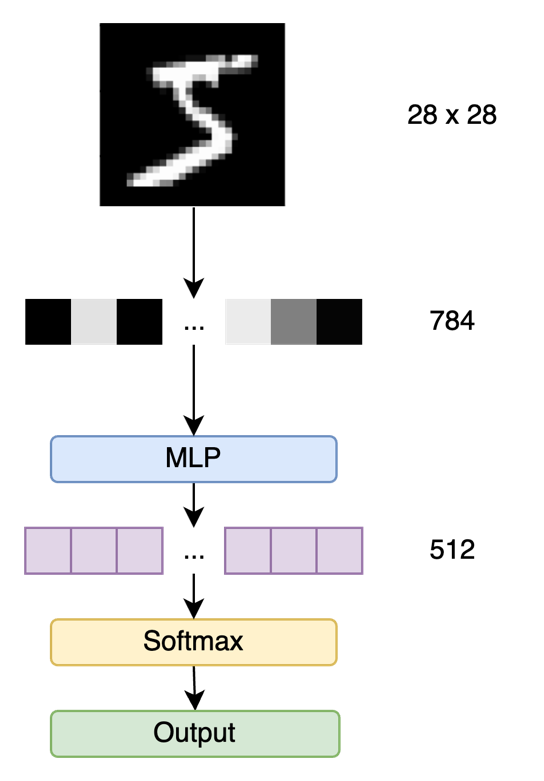

### 1. Xây dựng mô hình 1-layer MLP

In [14]:
# Mô hình 1 lớp MLP (1 lớp output), activation function = 'softmax', optimizer = 'SGD'
model_1_layer = keras.Sequential([
    layers.Input(shape=(weight_train * height_train,)),
    # Dùng activation func = 'linear' vì ta sẽ dùng from_logits=True trong hàm loss - làm vậy để tránh log số quá nhỏ -> underflow
    layers.Dense(10, activation='linear'), 
    ], name='MLP_1_Hidden_Layer'
)

model_1_layer.summary()

Model: "MLP_1_Hidden_Layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### 2. Compile mô hình

In [15]:
model_1_layer.compile(
    optimizer=keras.optimizers.SGD(),
    # Loss function này nhận vào LOGITS và áp dụng Softmax bên trong
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # vì y_train, y_test là nhãn dạng số nguyên, không one-hot encoding
    metrics=['accuracy'],
)

### 3. Huấn luyện mô hình

In [16]:
print("--- Bắt đầu huấn luyện ---")
start_time = time.time()

history = model_1_layer.fit(
    X_train_flat,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_test_flat, y_test)
) # history lưu trữ thông tin quá trình huấn luyện

end_time = time.time()
print(f"--- Hoàn thành huấn luyện trong {end_time - start_time:.2f} giây ---")

--- Bắt đầu huấn luyện ---
Epoch 1/15
938/938 [==============================] - 3s 2ms/step - loss: 1.0020 - accuracy: 0.7659 - val_loss: 0.6063 - val_accuracy: 0.8633
Epoch 2/15
938/938 [==============================] - 2s 2ms/step - loss: 0.5560 - accuracy: 0.8649 - val_loss: 0.4795 - val_accuracy: 0.8805
Epoch 3/15
938/938 [==============================] - 2s 2ms/step - loss: 0.4745 - accuracy: 0.8775 - val_loss: 0.4284 - val_accuracy: 0.8904
Epoch 4/15
938/938 [==============================] - 2s 2ms/step - loss: 0.4351 - accuracy: 0.8848 - val_loss: 0.3989 - val_accuracy: 0.8955
Epoch 5/15
938/938 [==============================] - 2s 2ms/step - loss: 0.4107 - accuracy: 0.8899 - val_loss: 0.3803 - val_accuracy: 0.8993
Epoch 6/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3936 - accuracy: 0.8934 - val_loss: 0.3670 - val_accuracy: 0.9017
Epoch 7/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3808 - accuracy: 0.8960 - val_loss: 0.3564 - 

### 4. Kiểm tra quá trình học

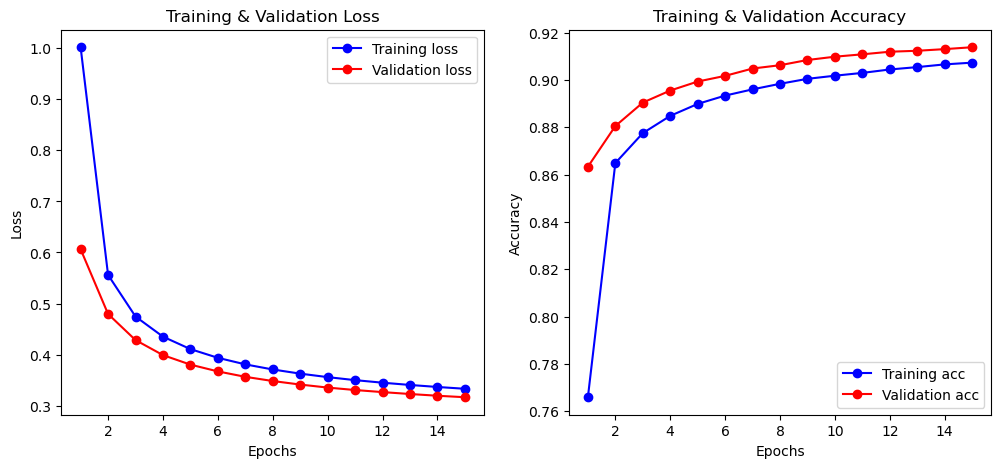

In [17]:
# Lấy dữ liệu từ history
history_dict = history.history

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# --- Vẽ Loss ---
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# --- Vẽ Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> Ta thấy training loss và validation loss đều giảm cùng nhau, và không có điểm lên xuống thất thường nào. Điều này chứng tỏ mô hình đã học tốt và không bị overfitting.

### 5. Đánh giá mô hình

In [18]:
# Lấy dự đoán trên tập test
y_pred_prob = model_1_layer.predict(X_test_flat)
y_pred = np.argmax(y_pred_prob, axis=1) # Chuyển từ xác suất (softmax) về nhãn (0-9)

print("\n--- ĐÁNH GIÁ TỔNG THỂ (MACRO AVG) ---")

# Tính toán các độ đo tổng thể
acc = accuracy_score(y_test, y_pred)
pre_macro = precision_score(y_test, y_pred, average='macro')
rec_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro') # Đây là F1-macro bạn yêu cầu

print(f"Overall Accuracy: {acc:.4f}")
print(f"Macro Precision:  {pre_macro:.4f}")
print(f"Macro Recall:     {rec_macro:.4f}")
print(f"Macro F1-Score:   {f1_macro:.4f}")

print("\n--- ĐÁNH GIÁ CHI TIẾT TỪNG CHỮ SỐ (0-9) ---")

# Sử dụng classification_report để in chi tiết precision, recall, f1-score cho từng lớp
# 'support' là số lượng mẫu thực tế của từng lớp trong tập test
print(classification_report(y_test, y_pred, digits=4))

313/313 [==============================] - 0s 900us/step

--- ĐÁNH GIÁ TỔNG THỂ (MACRO AVG) ---
Overall Accuracy: 0.9138
Macro Precision:  0.9129
Macro Recall:     0.9128
Macro F1-Score:   0.9127

--- ĐÁNH GIÁ CHI TIẾT TỪNG CHỮ SỐ (0-9) ---
              precision    recall  f1-score   support

           0     0.9421    0.9796    0.9605       980
           1     0.9558    0.9727    0.9642      1135
           2     0.9224    0.8760    0.8986      1032
           3     0.8956    0.9000    0.8978      1010
           4     0.9024    0.9226    0.9124       982
           5     0.8968    0.8576    0.8768       892
           6     0.9340    0.9457    0.9398       958
           7     0.9248    0.9086    0.9166      1028
           8     0.8708    0.8789    0.8748       974
           9     0.8843    0.8860    0.8851      1009

    accuracy                         0.9138     10000
   macro avg     0.9129    0.9128    0.9127     10000
weighted avg     0.9137    0.9138    0.9136     10000



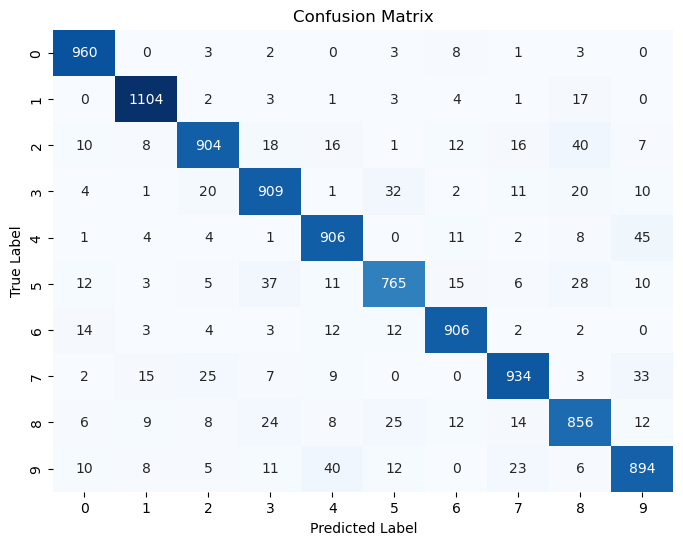

In [19]:
# --- VẼ CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Bài 2: Xây dựng mô hình 3-layer MLP, hàm ReLU và hàm softmax làm activation function. Trong đó activation function cho 2 layer đầu là ReLU và activation function cho layer cuối là Softmax. Huấn luyện mô hình này sử dụng SGD làm optimizer và đánh giá trên các độ đo accuracy, precision, recall và F1-macro. Đánh giá kết quả của mô hình với từng chữ số.

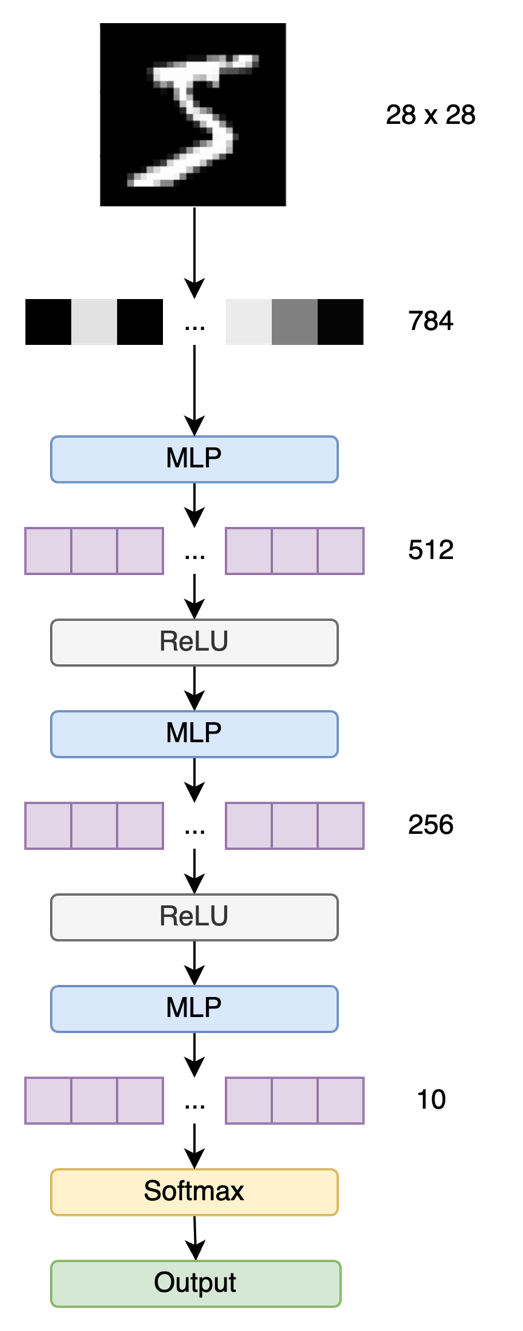

### 1. Xây dựng mô hình 3-layer MLP

In [16]:
# Mô hình 3 lớp hidden MLP, với 512, 256, 10 neuron và dùng activation function = 'relu' / 'soft max', optimizer = 'SGD'
model_3_layer = keras.Sequential([
    layers.Input(shape=(weight_train * height_train,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='linear'),
    ], name='MLP_3_Hidden_Layer'
)

model_3_layer.summary()

Model: "MLP_3_Hidden_Layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### 2. Compile mô hình

In [17]:
model_3_layer.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # vì y_train, y_test là nhãn dạng số nguyên, không one-hot encoding
    metrics=['accuracy'],
)

### 3. Huấn luyện mô hình

In [18]:
print("--- Bắt đầu huấn luyện ---")
start_time = time.time()

history_3_layer = model_3_layer.fit(
    X_train_flat,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_test_flat, y_test)
) # history lưu trữ thông tin quá trình huấn luyện

end_time = time.time()
print(f"--- Hoàn thành huấn luyện trong {end_time - start_time:.2f} giây ---")

--- Bắt đầu huấn luyện ---
Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 0.7762 - accuracy: 0.8206 - val_loss: 0.3645 - val_accuracy: 0.9016
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3373 - accuracy: 0.9054 - val_loss: 0.2875 - val_accuracy: 0.9210
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2817 - accuracy: 0.9204 - val_loss: 0.2579 - val_accuracy: 0.9283
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2495 - accuracy: 0.9287 - val_loss: 0.2302 - val_accuracy: 0.9349
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2253 - accuracy: 0.9361 - val_loss: 0.2088 - val_accuracy: 0.9409
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2059 - accuracy: 0.9416 - val_loss: 0.1973 - val_accuracy: 0.9445
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1898 - accuracy: 0.9463 - val_loss: 0.1831 - 

### 4. Kiểm tra quá trình học

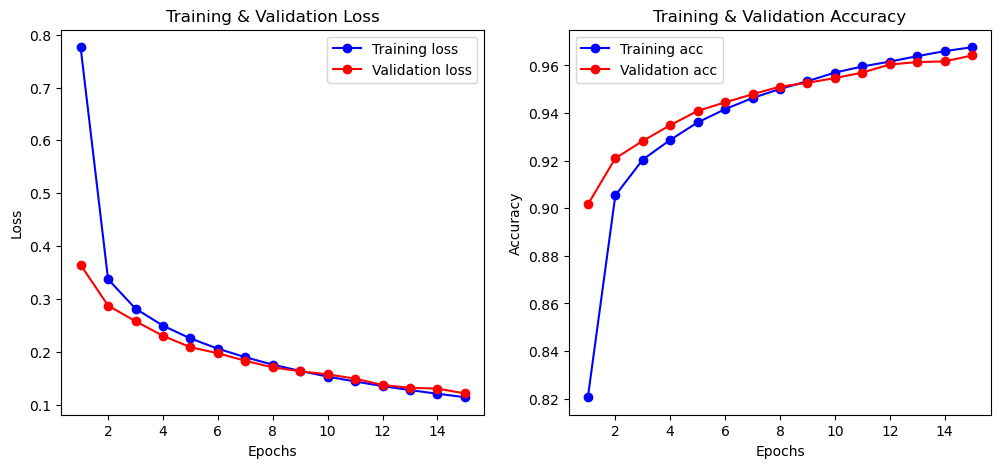

In [19]:
# Lấy dữ liệu từ history
history_dict = history_3_layer.history

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# --- Vẽ Loss ---
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# --- Vẽ Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> Ta thấy training loss và validation loss đều giảm cùng nhau, và không có điểm lên xuống thất thường nào. Điều này chứng tỏ mô hình đã học tốt và không bị overfitting. Sau epoch số 9, thì training acc cao hơn validation acc, nhưng validation acc vẫn tăng theo số epoch tăng dần, nên ta chưa có overfitting.

### 5. Đánh giá mô hình

In [20]:
# Lấy dự đoán trên tập test
y_pred_prob = model_3_layer.predict(X_test_flat)
y_pred = np.argmax(y_pred_prob, axis=1) # Chuyển từ xác suất (softmax) về nhãn (0-9)

print("\n--- ĐÁNH GIÁ TỔNG THỂ (MACRO AVG) ---")

# Tính toán các độ đo tổng thể
acc = accuracy_score(y_test, y_pred)
pre_macro = precision_score(y_test, y_pred, average='macro')
rec_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro') # Đây là F1-macro bạn yêu cầu

print(f"Overall Accuracy: {acc:.4f}")
print(f"Macro Precision:  {pre_macro:.4f}")
print(f"Macro Recall:     {rec_macro:.4f}")
print(f"Macro F1-Score:   {f1_macro:.4f}")

print("\n--- ĐÁNH GIÁ CHI TIẾT TỪNG CHỮ SỐ (0-9) ---")

# Sử dụng classification_report để in chi tiết precision, recall, f1-score cho từng lớp
# 'support' là số lượng mẫu thực tế của từng lớp trong tập test
print(classification_report(y_test, y_pred, digits=4))

313/313 [==============================] - 1s 2ms/step

--- ĐÁNH GIÁ TỔNG THỂ (MACRO AVG) ---
Overall Accuracy: 0.9642
Macro Precision:  0.9640
Macro Recall:     0.9638
Macro F1-Score:   0.9639

--- ĐÁNH GIÁ CHI TIẾT TỪNG CHỮ SỐ (0-9) ---
              precision    recall  f1-score   support

           0     0.9622    0.9857    0.9738       980
           1     0.9833    0.9859    0.9846      1135
           2     0.9607    0.9709    0.9658      1032
           3     0.9540    0.9644    0.9591      1010
           4     0.9653    0.9623    0.9638       982
           5     0.9669    0.9507    0.9587       892
           6     0.9656    0.9666    0.9661       958
           7     0.9657    0.9591    0.9624      1028
           8     0.9577    0.9528    0.9552       974
           9     0.9585    0.9395    0.9489      1009

    accuracy                         0.9642     10000
   macro avg     0.9640    0.9638    0.9639     10000
weighted avg     0.9642    0.9642    0.9642     10000



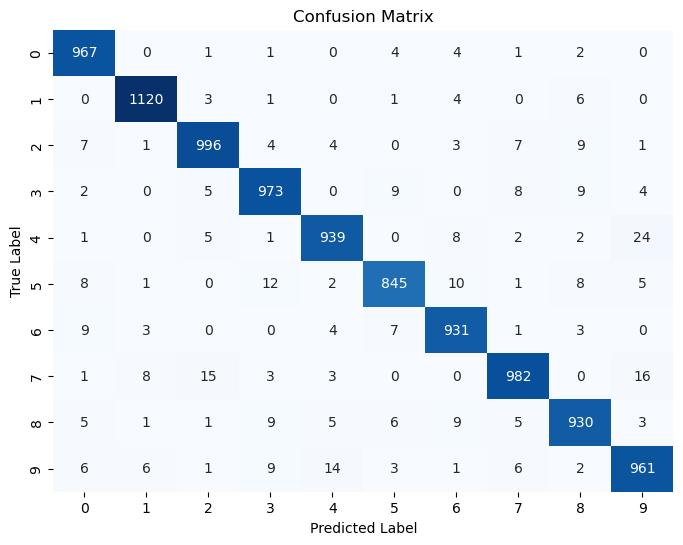

In [27]:
# --- VẼ CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Thử tối ưu bằng tiền xử lý data và 1 số kỹ thuật khác nhưng Vẫn dữ nguyên số layer, nerons, activation, optimizer.

### 2. Tăng cường dữ liệu

### 1. Chuẩn hóa dữ liệu

Ta sẽ chuẩn hóa z-score normalization trước, chỉ dùng tập train để tránh data leakage

In [21]:
mean = X_train_flat.mean()
std = X_train_flat.std()
print(f"Mean: {mean:.4f}, Std: {std:.4f}")

Mean: 0.1307, Std: 0.3081


In [22]:
X_train_flat = (X_train_flat - mean) / std
X_test_flat  = (X_test_flat - mean) / std

print(f"vector training ảnh sau khi z-score normalize: {X_train_flat[0][300:310]}") 
print(f"vector ảnh sau khi z-score normalize: {X_test_flat[0][300:310]}")

vector training ảnh sau khi z-score normalize: [-0.42407444 -0.42407444 -0.42407444 -0.42407444 -0.42407444 -0.42407444
 -0.42407444 -0.42407444 -0.42407444 -0.42407444]
vector ảnh sau khi z-score normalize: [ 2.8088155   0.9250843  -0.42407444 -0.42407444 -0.42407444 -0.42407444
 -0.42407444 -0.42407444 -0.42407444 -0.42407444]


### 3.Giảm dần learning rate khi huấn luyện 

In [23]:
# Giảm dần learning rate theo hàm mũ: lr = initial_lr * exp(-decay_rate * epoch)
initial_lr = 0.05
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=1000,      # số bước cập nhật (mini-batch) trước mỗi lần giảm
    decay_rate=0.96,       # hệ số giảm (0.96 nghĩa là giảm 4% mỗi 1000 step)
    staircase=True         # giảm theo bậc (từng nấc) thay vì liên tục
)

In [24]:
# Mô hình 3 lớp hidden MLP, với 512, 256, 10 neuron và dùng activation function = 'relu' / 'soft max', optimizer = 'SGD'
model_3_layer = keras.Sequential([
    layers.Input(shape=(weight_train * height_train,)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),   # L2 Regularization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dense(10, activation='linear'),
], name='3-layer-MLP')

model_3_layer.summary()

Model: "3-layer-MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### 2. Compile mô hình

In [25]:
optimizer = keras.optimizers.SGD(
    learning_rate=lr_schedule,   # dùng schedule thay vì cố định
    momentum=0.9,                # giúp SGD ổn định hơn
    nesterov=True                # optional: bật Nesterov momentum
)

model_3_layer.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # vì y_train, y_test là nhãn dạng số nguyên, không one-hot encoding
    metrics=['accuracy'],
)

### 3. Huấn luyện mô hình

In [26]:
print("--- Bắt đầu huấn luyện ---")
start_time = time.time()

history_3_layer = model_3_layer.fit(
    X_train_flat,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_test_flat, y_test)
)

end_time = time.time()
print(f"--- Hoàn thành huấn luyện trong {end_time - start_time:.2f} giây ---")

--- Bắt đầu huấn luyện ---
Epoch 1/15
938/938 [==============================] - 5s 5ms/step - loss: 0.2874 - accuracy: 0.9432 - val_loss: 0.2216 - val_accuracy: 0.9625
Epoch 2/15
938/938 [==============================] - 3s 4ms/step - loss: 0.1843 - accuracy: 0.9742 - val_loss: 0.1782 - val_accuracy: 0.9767
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1533 - accuracy: 0.9822 - val_loss: 0.1835 - val_accuracy: 0.9740
Epoch 4/15
938/938 [==============================] - 3s 4ms/step - loss: 0.1368 - accuracy: 0.9851 - val_loss: 0.1594 - val_accuracy: 0.9777
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1200 - accuracy: 0.9886 - val_loss: 0.1632 - val_accuracy: 0.9782
Epoch 6/15
938/938 [==============================] - 3s 4ms/step - loss: 0.1081 - accuracy: 0.9913 - val_loss: 0.1561 - val_accuracy: 0.9778
Epoch 7/15
938/938 [==============================] - 3s 4ms/step - loss: 0.0945 - accuracy: 0.9939 - val_loss: 0.1489 - 

### 4. Kiểm tra quá trình học

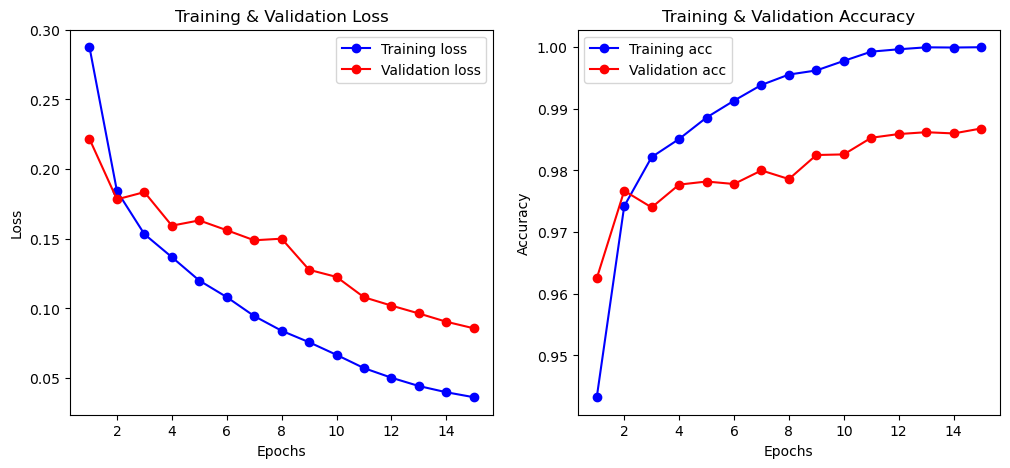

In [27]:
# Lấy dữ liệu từ history
history_dict = history_3_layer.history

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# --- Vẽ Loss ---
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# --- Vẽ Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> Ta thấy training loss và validation loss đều giảm cùng nhau, và không có điểm lên xuống thất thường nào. Điều này chứng tỏ mô hình đã học tốt và không bị overfitting. Sau epoch số 9, mặc dù có chút biến động tăng giảm, nhưng nhìn chung validation acc vẫn tăng theo số epoch tăng dần, nên ta chưa có overfitting.

### 5. Đánh giá mô hình

In [28]:
# Lấy dự đoán trên tập test
y_pred_prob = model_3_layer.predict(X_test_flat)
y_pred = np.argmax(y_pred_prob, axis=1) # Chuyển từ xác suất (softmax) về nhãn (0-9)

print("\n--- ĐÁNH GIÁ TỔNG THỂ (MACRO AVG) ---")

# Tính toán các độ đo tổng thể
acc = accuracy_score(y_test, y_pred)
pre_macro = precision_score(y_test, y_pred, average='macro')
rec_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro') # Đây là F1-macro bạn yêu cầu

print(f"Overall Accuracy: {acc:.4f}")
print(f"Macro Precision:  {pre_macro:.4f}")
print(f"Macro Recall:     {rec_macro:.4f}")
print(f"Macro F1-Score:   {f1_macro:.4f}")

print("\n--- ĐÁNH GIÁ CHI TIẾT TỪNG CHỮ SỐ (0-9) ---")

# Sử dụng classification_report để in chi tiết precision, recall, f1-score cho từng lớp
# 'support' là số lượng mẫu thực tế của từng lớp trong tập test
print(classification_report(y_test, y_pred, digits=4))

313/313 [==============================] - 1s 4ms/step

--- ĐÁNH GIÁ TỔNG THỂ (MACRO AVG) ---
Overall Accuracy: 0.9868
Macro Precision:  0.9868
Macro Recall:     0.9867
Macro F1-Score:   0.9867

--- ĐÁNH GIÁ CHI TIẾT TỪNG CHỮ SỐ (0-9) ---
              precision    recall  f1-score   support

           0     0.9888    0.9929    0.9908       980
           1     0.9938    0.9938    0.9938      1135
           2     0.9874    0.9874    0.9874      1032
           3     0.9842    0.9871    0.9857      1010
           4     0.9867    0.9847    0.9857       982
           5     0.9898    0.9821    0.9859       892
           6     0.9864    0.9875    0.9870       958
           7     0.9873    0.9835    0.9854      1028
           8     0.9887    0.9846    0.9866       974
           9     0.9745    0.9832    0.9788      1009

    accuracy                         0.9868     10000
   macro avg     0.9868    0.9867    0.9867     10000
weighted avg     0.9868    0.9868    0.9868     10000



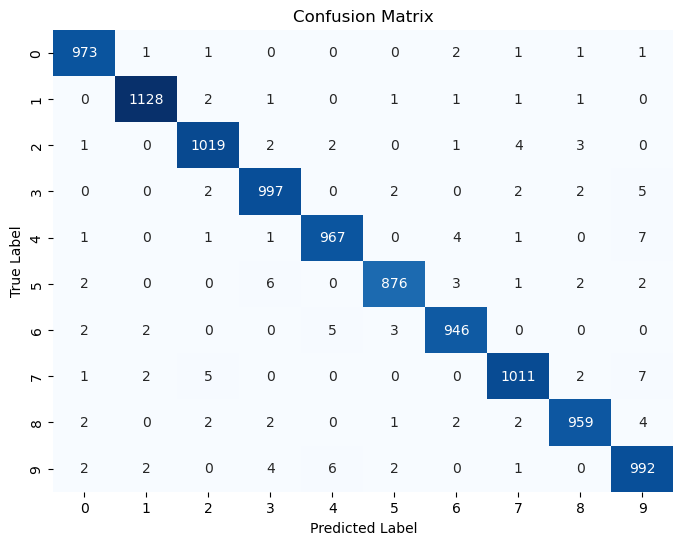

In [29]:
# --- VẼ CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()